### DATA CLEANING

In [46]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import the csv file generated from web scraping the amazon website
df = pd.read_csv('Amazon Books.csv')
df.head()

,Unnamed: 0,TITLE,AUTHOR,DATE,STAR,RATING,CATEGORY
0,0,Alice's Adventures in Wonderland: 150th Annive...,Lewis Carroll,"Sep 29, 2015",4.5,8259,Arts & Photography
1,1,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,"Oct 1, 2010",4.7,8170,Arts & Photography
2,2,Lettering and Modern Calligraphy: A Beginner's...,|,"Oct 27, 2017",4.4,8156,Arts & Photography
3,3,Disney Dreams Collection Thomas Kinkade Studio...,Thomas Kinkade,"Sep 19, 2017",4.7,8004,Arts & Photography
4,4,Hinch Yourself Happy: All The Best Cleaning Ti...,Mrs Hinch,"Apr 4, 2019",4.7,7739,Arts & Photography


In [5]:
# removing the unnamed column
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
# giving the labels a more informative name
column_names = {'CATEGORY':'Category', 'TITLE':'Title', 'AUTHOR':'Author','DATE':'Date Published', 'STAR':'Rating','RATING':'Number of Ratings' }
df= df.rename(columns=column_names)

In [7]:
df.head()

,Title,Author,Date Published,Rating,Number of Ratings,Category
0,Alice's Adventures in Wonderland: 150th Annive...,Lewis Carroll,"Sep 29, 2015",4.5,8259,Arts & Photography
1,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,"Oct 1, 2010",4.7,8170,Arts & Photography
2,Lettering and Modern Calligraphy: A Beginner's...,|,"Oct 27, 2017",4.4,8156,Arts & Photography
3,Disney Dreams Collection Thomas Kinkade Studio...,Thomas Kinkade,"Sep 19, 2017",4.7,8004,Arts & Photography
4,Hinch Yourself Happy: All The Best Cleaning Ti...,Mrs Hinch,"Apr 4, 2019",4.7,7739,Arts & Photography


#### More cleanings on each of the columns

In [8]:
# CATEGORY

#Get the number and list of unique categories
df['Category'].nunique(), list(df['Category'].unique())

(5,
 ['Arts & Photography',
  'Biographies & Memoirs',
  'Business & Money',
  'Avg. Customer Review',
  "Children's Books"])

In [10]:
# Avg. Customer Review seems to be scrapped incorrectly, so we replace it
df['Category'] = df['Category'].replace('Avg. Customer Review','Calendars')

#confirming the change
df['Category'].nunique(), list(df['Category'].unique())

(5,
 ['Arts & Photography',
  'Biographies & Memoirs',
  'Business & Money',
  'Calendars',
  "Children's Books"])

In [11]:
# DATE PUBLISHED
from datetime import datetime

In [12]:
#check for indexes with anomalies
df[df['Date Published']=='-']

,Title,Author,Date Published,Rating,Number of Ratings,Category


In [13]:
#convert to standard datetime format
df['Date Published'] = pd.to_datetime(df['Date Published'], format='%b %d, %Y', errors='coerce')

In [14]:
df.head()

,Title,Author,Date Published,Rating,Number of Ratings,Category
0,Alice's Adventures in Wonderland: 150th Annive...,Lewis Carroll,2015-09-29,4.5,8259,Arts & Photography
1,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,2010-10-01,4.7,8170,Arts & Photography
2,Lettering and Modern Calligraphy: A Beginner's...,|,2017-10-27,4.4,8156,Arts & Photography
3,Disney Dreams Collection Thomas Kinkade Studio...,Thomas Kinkade,2017-09-19,4.7,8004,Arts & Photography
4,Hinch Yourself Happy: All The Best Cleaning Ti...,Mrs Hinch,2019-04-04,4.7,7739,Arts & Photography


In [16]:
# MISSING VALUES

#check for columns with missing values
df.isnull().sum()

Title                0
Author               0
Date Published       0
Rating               0
Number of Ratings    0
Category             0
dtype: int64

### DATA ANALYSIS

In [18]:
df.head()

,Title,Author,Date Published,Rating,Number of Ratings,Category
0,Alice's Adventures in Wonderland: 150th Annive...,Lewis Carroll,2015-09-29,4.5,8259,Arts & Photography
1,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,2010-10-01,4.7,8170,Arts & Photography
2,Lettering and Modern Calligraphy: A Beginner's...,|,2017-10-27,4.4,8156,Arts & Photography
3,Disney Dreams Collection Thomas Kinkade Studio...,Thomas Kinkade,2017-09-19,4.7,8004,Arts & Photography
4,Hinch Yourself Happy: All The Best Cleaning Ti...,Mrs Hinch,2019-04-04,4.7,7739,Arts & Photography


In [20]:
df.shape

(224, 6)

In [22]:
df.describe()

,Number of Ratings
count,224.000000
mean,13560.959821
std,20851.398399
min,822.000000
25%,4951.250000
50%,8756.500000
75%,14754.000000
max,126815.000000


In [30]:
df1 = df.loc[df['Date Published'] <='2020']

In [31]:
df1.head() 

,Title,Author,Date Published,Rating,Number of Ratings,Category
0,Alice's Adventures in Wonderland: 150th Annive...,Lewis Carroll,2015-09-29,4.5,8259,Arts & Photography
1,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,2010-10-01,4.7,8170,Arts & Photography
2,Lettering and Modern Calligraphy: A Beginner's...,|,2017-10-27,4.4,8156,Arts & Photography
3,Disney Dreams Collection Thomas Kinkade Studio...,Thomas Kinkade,2017-09-19,4.7,8004,Arts & Photography
4,Hinch Yourself Happy: All The Best Cleaning Ti...,Mrs Hinch,2019-04-04,4.7,7739,Arts & Photography


In [32]:
df.shape

(224, 6)

#### WHAT IS THE HIGHEST RATING AND WHICH BOOK AND BOOK CATEGORY IS IT?

In [40]:
df1.sort_values('Number of Ratings', ascending = False).iloc[:5].Title.unique()

array(['The Pigeon HAS to Go to School!',
       'The Autobiography of Malcolm X: As Told to Alex Haley',
       'Corduroy',
       'Left to Tell: Discovering God Amidst the Rwandan Holocaust',
       'Lone Survivor: The Eyewitness Account of Operation Redwing and the Lost Heroes of SEAL Team 10'],
      dtype=object)

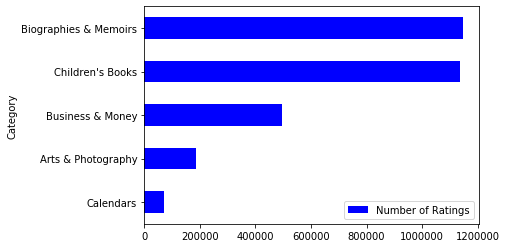

In [43]:
#categories with most reviews
most_review = df.groupby('Category')['Number of Ratings'].sum().to_frame().reset_index().sort_values('Number of Ratings', ascending = False).iloc[:5]
most_review.sort_values('Number of Ratings').plot.barh(x = 'Category', color = 'blue')